In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [26]:
df = pd.read_csv('nba_logreg2.csv', sep = ";")
df.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


In [27]:
##DESCRIPCION DE DATOS
print(df.describe())

                GP          MIN          PTS          FGM          FGA  \
count  1329.000000  1329.000000  1329.000000  1329.000000  1329.000000   
mean     60.402558    17.647931     6.820166     2.634763     5.902483   
std      17.481092     8.327441     4.365671     1.686850     3.598820   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.800000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.600000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1329.000000  1329.000000  1329.000000  1329.000000  1329.000000   
mean     44.117532     0.249661     0.785628    19.308126     1.302784   
std       6.119492     0.384608     1.063856    16.022916     0.989341   
min      23.800000     0.000000     0

In [28]:
print(df.columns)

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')


In [29]:
variablescontinuas = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs']

df_1 = df[variablescontinuas]

df_1.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Dejamos afuera la columna "Name" porque contiene nombres de jugadores donde esto no es adecuada para las operaciones numéricas como la estandarización.

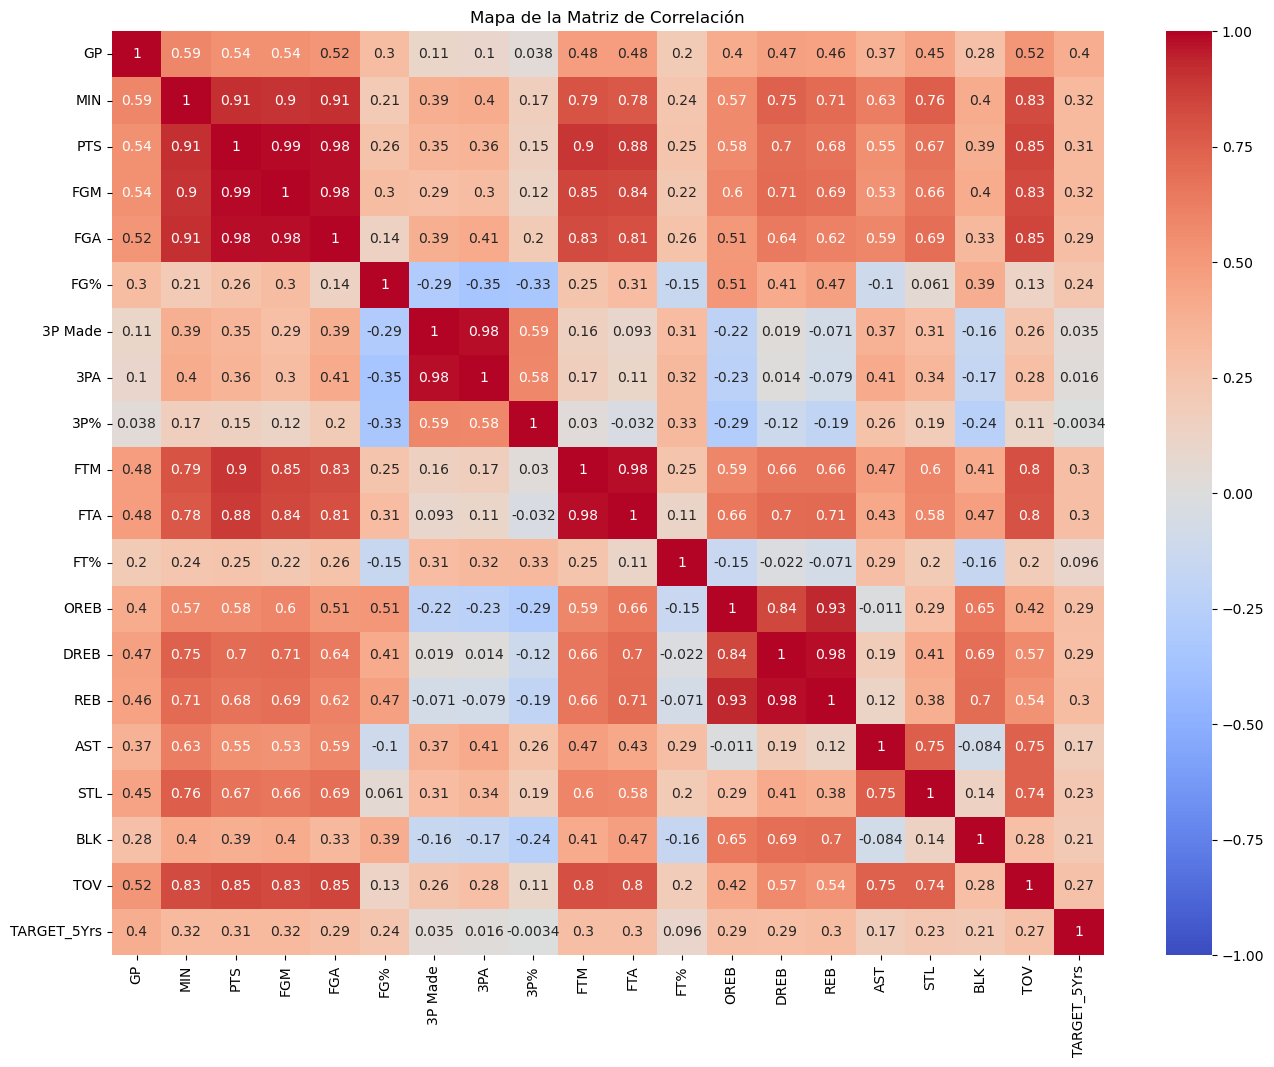

In [30]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_1. corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de la Matriz de Correlación')
plt .show()

Aqui tenemos una mejor visualizacion de los datos

In [55]:
#@title Importar biblioteca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd


In [59]:
data = pd.read_csv('nba_logreg2.csv')
print(data.columns)


Index(['Name;GP;MIN;PTS;FGM;FGA;FG%;3P Made;3PA;3P%;FTM;FTA;FT%;OREB;DREB;REB;AST;STL;BLK;TOV;TARGET_5Yrs'], dtype='object')


In [60]:
# Instanciar y aplicar fit_transform
data_std = StandardScaler().fit_transform(df_1)

In [64]:

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas específicas
df_data_std = pd.DataFrame(data_std, columns=df_1.columns)


Ahora aplicaremos la funcion PCA

In [65]:
#@title Aplicar función PCA
pca = PCA()

# Entrenar y transformar dataset Normalizado. Esto genera un nuevo dataset reducido
data_std_pca = pca.fit_transform(data_std)

#Visualizar el porcentaje varianza explicada por cada una de las componentes.
pct_varianza_explicada = pca.explained_variance_ratio_
pct_varianza_explicada

array([4.83476875e-01, 1.95195970e-01, 6.17003743e-02, 5.21024618e-02,
       4.07206123e-02, 3.14218278e-02, 2.92411661e-02, 2.50872910e-02,
       2.20228252e-02, 1.98578845e-02, 1.30235038e-02, 1.16191505e-02,
       5.46338394e-03, 4.98327478e-03, 2.70962954e-03, 7.31832869e-04,
       3.83304923e-04, 2.31800692e-04, 1.84004241e-05, 8.43063629e-06])

Explicación de los Supuestos del PCA.

El PCA asume que los datos están escalados. Es por eso que usamos StandardScaler para estandarizar los datos, asegurando que cada característica tenga media 0 y desviación estándar 1.

Linealidad: El PCA asume que las relaciones entre las características son lineales. 

Varianza Maximizada: El PCA busca encontrar las direcciones (componentes principales) que maximicen la varianza en los datos. Los primeros componentes principales capturan la mayor parte de la variabilidad en los datos.

Interpretación de los Resultados

Los primeros dos componentes principales (PCA1 y PCA2) capturan aproximadamente 67.87% (48.35% + 19.52%) de la varianza total. Esto sugiere que estos dos componentes principales son los más importantes en términos de captura de la variabilidad en los datos.

Para entender cuántos componentes principales son necesarios para capturar una cantidad significativa de la varianza total, a menudo se calcula la varianza explicada acumulada.